In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


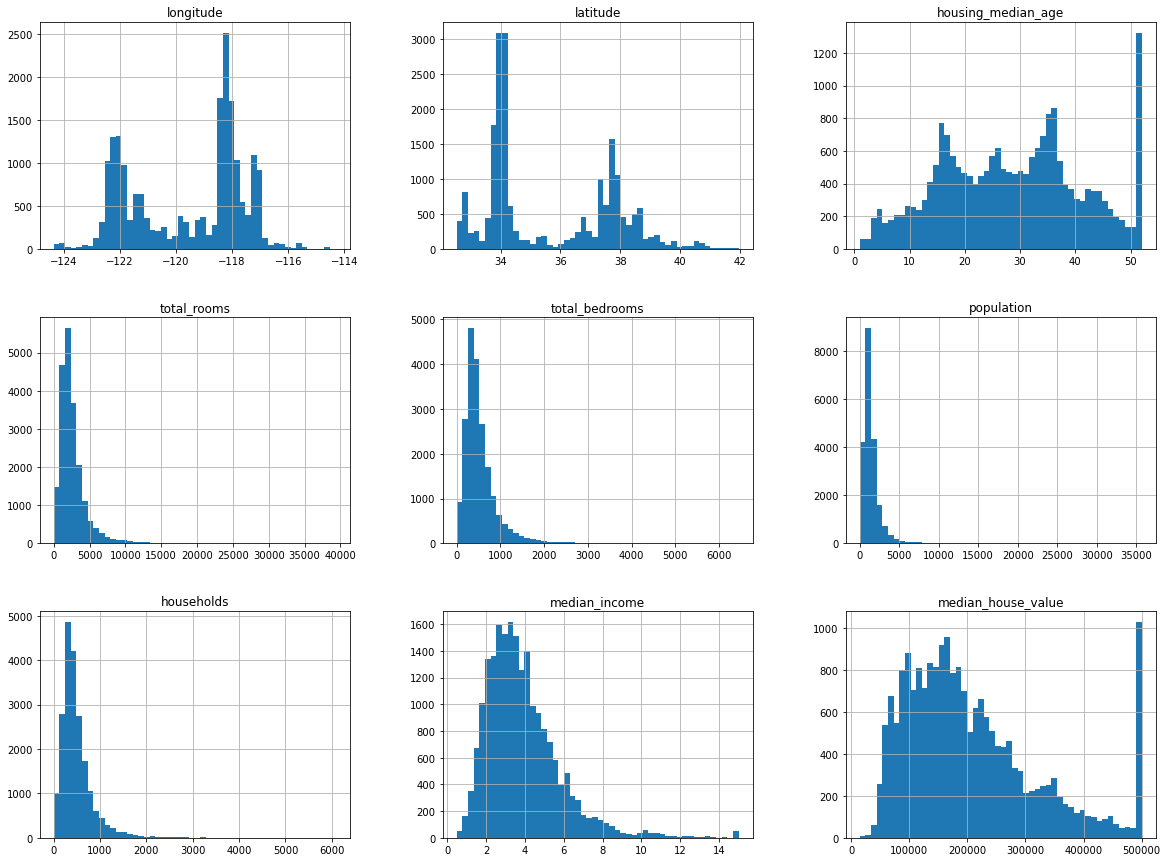

In [8]:

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [9]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:

train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [11]:
len(test_set)

4128

In [12]:
#method 2 to do the split...using hash functions

from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

##### What is happening:- 
we have an identfier column(unique column for each instance) , we find the hash 
using crc32 (checksum) we , if the calculted value is less than 20% of the max we keep in the test set


######unfortunately our data here has no identifier so we will use index as idetofier


The implementation of test_set_check() above works fine in both Python 2 and Python 3. In earlier releases, the following implementation was proposed, which supported any hash function, but was much slower and did not support Python 2:

In [13]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [14]:

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [15]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
train_set.shape

(16512, 10)

In [17]:
test_set.shape

(4128, 10)

In [18]:
#classfieng and creating a new column for median income , if it is a very important feature, dividing the income in 5 groups
housing['income_cat'] = pd.cut(housing['median_income'], 
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5])

In [19]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot:>

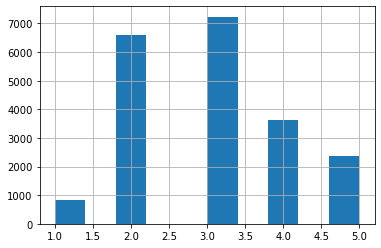

In [20]:
housing['income_cat'].hist()

In [21]:
#now as we have created groups (strata) , we can do the stratified sampling, bringing enough examples for each strata

In [22]:
#we can do the stratified sampling using sklearn
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [23]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    start_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [25]:
start_train_set['income_cat'].value_counts()/len(strat_test_set)

3    1.402374
2    1.275436
4    0.705184
5    0.457607
1    0.159399
Name: income_cat, dtype: float64

In [26]:
for set_ in (strat_test_set, start_train_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [27]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


In [28]:
#to play with the data make a copy to not mess with data, do it only on the train data, leave test data alone
house = start_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

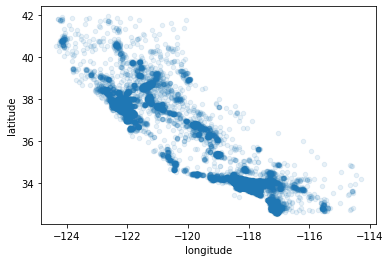

In [29]:
#visualizing geographical data
house.plot(kind='scatter', x='longitude', y='latitude',alpha=0.1)

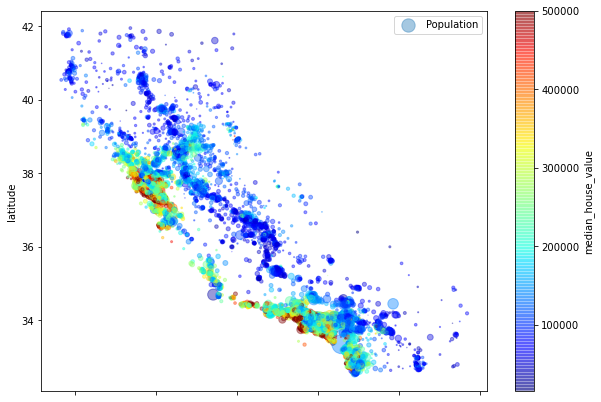

In [30]:
house.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=house['population']/100, label='Population', figsize=(10,7),
          c='median_house_value', cmap = plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [31]:
#looking for correlation
corr_matrix = house.corr()

In [32]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [33]:
from pandas.plotting import scatter_matrix

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

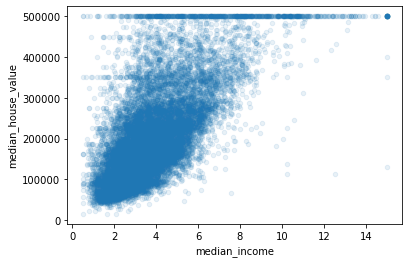

In [34]:
house.plot(kind='scatter', x='median_income',y='median_house_value', alpha=0.1)

In [35]:
#creating new attributes by combinig or manipulating
house['rooms_per_household'] = house['total_rooms'] / house['households']
house['bedrooms_per_room'] = house['total_bedrooms'] / house['total_rooms']
house['population_per_household'] = house['population'] / house['households']

In [36]:
corr_m = house.corr()

In [37]:
corr_m['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [38]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [39]:
#separating the predictors and labels
housing = start_train_set.drop('median_house_value' , axis=1)
housing_labels = start_train_set['median_house_value'].copy()

In [40]:
#using scikit learn's imputer to fill missing with means
from sklearn.impute import SimpleImputer

In [41]:
imputer = SimpleImputer(strategy='median')

In [42]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [43]:
#removing categorical
housing_num = housing.drop('ocean_proximity', axis=1)

In [44]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [45]:
#fitting the imputer , this calculates median of all the attributes and stores it in the statistics_ variable
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [46]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [47]:
#filling the null values
X = imputer.transform(housing_num)

In [48]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [49]:
#categorical features

In [50]:
housing_cat = housing[['ocean_proximity']]

In [51]:
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
cat_encoder = OneHotEncoder()

In [54]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [55]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [56]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [57]:

from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [58]:
from sklearn.pipeline import Pipeline

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [61]:
from sklearn.compose import ColumnTransformer

In [62]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [63]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [64]:
housing_prepared = full_pipeline.fit_transform(housing)

In [65]:
#training a model
#first we train a linear regression

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [68]:
#trying out on some instances of the training data
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [69]:
print('predictions:', lin_reg.predict(some_data_prepared))

predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [70]:
print('labels:', list(some_labels))

labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [71]:
#finding RMSE 
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [72]:
#trying  a more powerfil dicision tree model
from sklearn.tree import DecisionTreeRegressor


In [73]:
tree_rig = DecisionTreeRegressor()
tree_rig.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [74]:
tree_rig

DecisionTreeRegressor()

In [75]:
houing_predictions1 = tree_rig.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, houing_predictions1)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [76]:
#model has probaly overfit as it shows 0 error, lets try k fold cross valiadation
from sklearn.model_selection import cross_val_score

In [77]:
scores = cross_val_score(tree_rig, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_score = np.sqrt(-scores)

In [78]:
def display_scores(scores):
    print("scores", scores)
    print("mean", scores.mean())
    print("std", scores.std())

In [79]:
display_scores(tree_rmse_score)

scores [69060.75532328 65549.74174736 70817.78690593 70323.02912013
 69578.91125899 74068.39646309 70966.0984036  72093.93273229
 75587.81584421 69313.04009694]
mean 70735.9507895817
std 2641.714072449224


In [80]:
#trying cross val on linear regression
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_score = np.sqrt(-lin_scores)

In [81]:
display_scores(lin_rmse_score)

scores [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean 69052.46136345083
std 2731.674001798349


In [82]:
#we see that the decision tree overfits so much that linear  regression is performing better
from sklearn.ensemble import RandomForestRegressor

In [83]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [84]:
housing_predictions2 = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions2)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.907283883913

In [85]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

scores [49309.56719115 47542.62588623 50028.67078438 52150.38525175
 49449.1582016  53760.02632127 48912.2715536  48210.35248798
 52805.8783784  50408.68714592]
mean 50257.76232022747
std 1932.4374317847762


Fine Tuning

In [86]:
#Trying grid search cv for randomforest


In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

In [89]:
forest_reg1 = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg1, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [90]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [91]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [92]:
cvres = grid_search.cv_results_

In [93]:
for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
    print(np.sqrt(-mean_score), params)

65401.53280163433 {'max_features': 2, 'n_estimators': 3}
55113.62857881301 {'max_features': 2, 'n_estimators': 10}
52970.6424676179 {'max_features': 2, 'n_estimators': 30}
60444.96542126485 {'max_features': 4, 'n_estimators': 3}
53158.07201446753 {'max_features': 4, 'n_estimators': 10}
50592.85881028632 {'max_features': 4, 'n_estimators': 30}
58707.15961818216 {'max_features': 6, 'n_estimators': 3}
51753.65228240076 {'max_features': 6, 'n_estimators': 10}
49896.55876130209 {'max_features': 6, 'n_estimators': 30}
59329.70876545061 {'max_features': 8, 'n_estimators': 3}
52055.57876666701 {'max_features': 8, 'n_estimators': 10}
49943.185617056384 {'max_features': 8, 'n_estimators': 30}
62554.40600755183 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54643.07507757014 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61486.05885984072 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53003.600837997845 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [94]:
# we can also check the importance of features by inspecting a model, 
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.84813784e-02, 6.78396097e-02, 4.30457560e-02, 1.81103262e-02,
       1.64187884e-02, 1.69656225e-02, 1.70549065e-02, 3.38145419e-01,
       6.64379029e-02, 1.06873580e-01, 5.50797076e-02, 1.23912158e-02,
       1.54821317e-01, 1.34189770e-04, 3.07085630e-03, 5.12942379e-03])

In [95]:
#displaying feature importance with features
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories[0])
attributes = num_attribs + cat_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.3381454192167986, 'median_income'),
 (0.15482131732446383, 'a'),
 (0.10687357953375039, 'rooms_per_hhold'),
 (0.0784813784227618, 'longitude'),
 (0.06783960968179491, 'latitude'),
 (0.06643790294866389, 'ocean_proximity'),
 (0.05507970763872132, 'pop_per_hhold'),
 (0.04304575604404349, 'housing_median_age'),
 (0.01811032615364516, 'total_rooms'),
 (0.017054906477952738, 'households'),
 (0.016965622524921706, 'population'),
 (0.01641878840124828, 'total_bedrooms'),
 (0.012391215773558716, 'bedrooms_per_room')]

In [96]:
#Evaluating model on test set  ########## we should not do fit_transform on test data, just transform

In [97]:
final_model = grid_search.best_estimator_

In [98]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [99]:
X_test_prepared = full_pipeline.transform(X_test)

In [100]:
final_predictions = final_model.predict(X_test_prepared)

In [101]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [102]:
final_rmse

47966.803752799344

In [103]:
#computing 95% confidence interval  for the generalization error
from scipy import stats

In [104]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), 
                        scale=stats.sem(squared_errors)))

array([45983.86691887, 49870.95856014])

In [105]:
#trying svm
from sklearn.svm import SVR

In [111]:
svr_reg = SVR(kernel='linear')

In [112]:
svr_reg.fit(housing_prepared, housing_labels)

SVR(kernel='linear')

In [113]:
housing_predictions3 = svr_reg.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels, housing_predictions3)
svr_rmse = np.sqrt(svr_mse)

In [114]:
svr_rmse

111094.6308539982

In [115]:
svr_scores = cross_val_score(svr_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=5)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

scores [109554.16396803 112422.0947246  113970.08259411 113427.52864218
 113430.29743241]
mean 112560.8334722674
std 1584.4507648248702


In [118]:
#pipeline for datapreparation and prediction
combined_pipeline = Pipeline([
    ('columntransform', full_pipeline),
    ('prediction', SVR(kernel='rbf'))
])


In [119]:
combined_pipeline.fit(housing, housing_labels)
combined_pipeline.predict(some_data)

array([179072.49583029, 179914.66366523, 179110.86627073, 178283.07121413,
       179552.22286513])

In [120]:
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

In [121]:
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   5.3s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   5.4s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   5.3s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   5.2s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   5.3s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   5.2s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   5.1s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   5.3s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 34.3min finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [122]:
grid_search.best_estimator_

SVR(C=30000.0, kernel='linear')